In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, ReLU, BatchNormalization, MaxPool2D, Flatten, Dropout
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [ ]:
X_train, X_test = X_train / 255.0, X_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

In [ ]:
num_classes = len(set(y_train))
inputs = X_train.shape[1:]

X_train.shape[1:]

(32, 32, 3)

In [ ]:
inputs = tf.keras.layers.Input(shape=X_train.shape[1:])

layer_1 = Conv2D(256, kernel_size=3, activation='relu', padding="same",
                 kernel_initializer="he_normal")(inputs)

layer_2 = BatchNormalization()(layer_1)

layer_3 = Conv2D(256, kernel_size=3, activation='relu', padding="same",
                 kernel_initializer="he_normal")(layer_2)

layer_4 = BatchNormalization()(layer_3)
layer_5 = MaxPool2D()(layer_4)
layer_6 = Dropout(0.65)(layer_5)




layer_7 = Conv2D(256, kernel_size=3, activation='relu', padding="same",
                  kernel_initializer="he_normal")(layer_6)

layer_8 = BatchNormalization()(layer_7)

layer_9 = Conv2D(256, kernel_size=3, activation='relu', padding="same",
                  kernel_initializer="he_normal")(layer_8)

layer_10 = BatchNormalization()(layer_9)
layer_11 = MaxPool2D()(layer_10)
layer_12 = Dropout(0.65)(layer_11)




layer_13 = Conv2D(256, kernel_size=3, activation='relu', padding="same",
                  kernel_initializer="he_normal")(layer_12)

layer_14 = BatchNormalization()(layer_13)

layer_15 = Conv2D(256, kernel_size=3, activation='relu', padding="same",
                  kernel_initializer="he_normal")(layer_14)

layer_16 = BatchNormalization()(layer_15)
layer_17 = MaxPool2D()(layer_16)
layer_18 = Dropout(0.65)(layer_17)




layer_19 = Conv2D(256, kernel_size=3, activation='relu', padding="same",
                  kernel_initializer="he_normal")(layer_18)

layer_20 = BatchNormalization()(layer_19)

layer_21 = Conv2D(256, kernel_size=3, activation='relu', padding="same",
                  kernel_initializer="he_normal")(layer_20)

layer_22 = BatchNormalization()(layer_21)
layer_23 = MaxPool2D()(layer_22)
layer_24 = Dropout(0.65)(layer_23)



layer_25 = Flatten()(layer_24)
layer_26 = Dense(128, activation='relu',
                 kernel_initializer="he_normal")(layer_25)
layer_27 = BatchNormalization()(layer_26)
layer_28 = Dropout(0.5)(layer_27)
outputs = Dense(num_classes, activation="softmax")(layer_28)

model = Model(inputs=inputs, outputs=outputs)

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer='adam', metrics=["accuracy"])

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 256)       7168      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 256)      1024      
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 256)       590080    
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 256)      1024      
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 256)      0     

In [ ]:
history = model.fit(X_train, y_train, batch_size=64, epochs=200, validation_data=(X_test, y_test))

Epoch 1/200
782/782 [==============================] - 65s 66ms/step - loss: 1.9369 - accuracy: 0.3304 - val_loss: 1.4748 - val_accuracy: 0.4719
Epoch 2/200
782/782 [==============================] - 49s 63ms/step - loss: 1.2572 - accuracy: 0.5468 - val_loss: 1.2192 - val_accuracy: 0.5919
Epoch 3/200
782/782 [==============================] - 49s 63ms/step - loss: 1.0106 - accuracy: 0.6431 - val_loss: 0.8720 - val_accuracy: 0.6940
Epoch 4/200
782/782 [==============================] - 49s 63ms/step - loss: 0.8541 - accuracy: 0.7052 - val_loss: 0.6930 - val_accuracy: 0.7613
Epoch 5/200
782/782 [==============================] - 49s 63ms/step - loss: 0.7398 - accuracy: 0.7485 - val_loss: 0.7289 - val_accuracy: 0.7597
Epoch 6/200
782/782 [==============================] - 49s 63ms/step - loss: 0.6656 - accuracy: 0.7738 - val_loss: 0.6208 - val_accuracy: 0.7923
Epoch 7/200
782/782 [==============================] - 49s 63ms/step - loss: 0.6068 - accuracy: 0.7962 - val_loss: 0.6468 - val_ac

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 4s 10ms/step - loss: 0.3976 - accuracy: 0.9148


[0.3976427912712097, 0.9147999882698059]

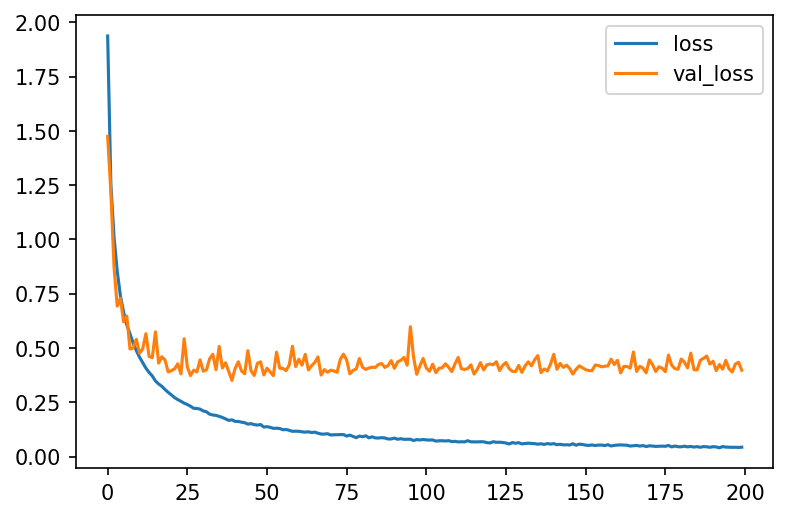

In [ ]:
plt.figure(dpi=150)
# plt.grid()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

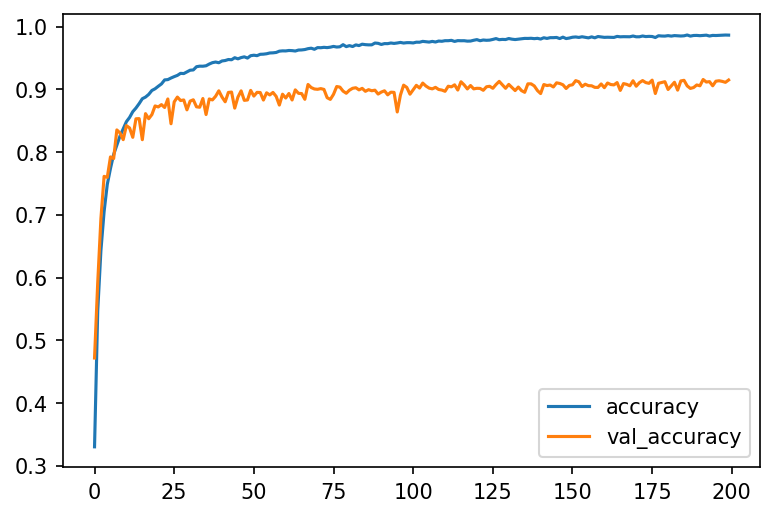

In [ ]:

plt.figure(dpi=150)
# plt.grid()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

In [ ]:
y_pred = model.predict(X_test)

y_pred_labels = [np.argmax(i) for i in y_pred]

cm = tf.math.confusion_matrix(labels= y_test, predictions= y_pred_labels, num_classes=num_classes)


313/313 [==============================] - 3s 9ms/step


Text(91.44444444444443, 0.5, 'Actual')

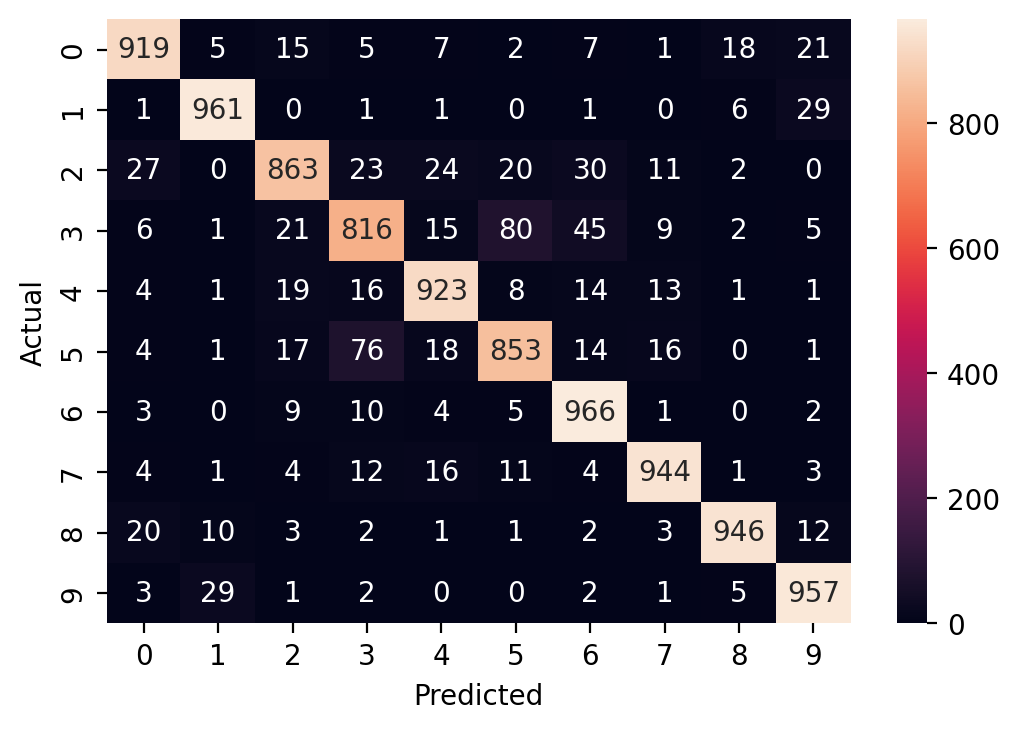

In [ ]:
plt.figure(dpi=200)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")